<a href="https://colab.research.google.com/github/DIFACQUIM/De-Novo_DNMT1/blob/main/07_Docking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install RDKit library and ptitprince for raincloud plots
!pip install rdkit
!pip install ptitprince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 4.2 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10656 sha256=372692397dc967da1ee48a763ec078bc3fbf49e07fb4cb3cef8f103d36bda64a
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
#Import necessary libraries
import pandas as pd

from rdkit import Chem
from rdkit.Chem import Descriptors

import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
import matplotlib.collections as clt

In [ ]:
#Read data from de novo compounds
df = pd.read_csv('/content/LigBuilder_2491_docking-scores.csv', sep= ',')
df

,SMILES,DATABASE,ID,PROGRAM,FRAGMENTS,DATASET,PROGRAM_SCORE,SMILES_chiral,SMILES_no_chiral,LeDock_scores,Vina_scores
0,c1(c(cc2c(c1)CNN2)CC(=O)OC[C@H](CO)NC(=O)C(=C)...,LB_DEFLT,LBDEF10_037,LigBuilder,Default,LB_DEFLT10,8.01,C=C(CN)C(=O)N[C@@H](CO)COC(=O)Cc1cc2c(cc1C(=O)...,C=C(CN)C(=O)NC(CO)COC(=O)Cc1cc2c(cc1C(=O)c1cc(...,-9.98,-9.101
1,Oc1cccc(c1)NC(=O)NC/C=C/C(=O)[C@H](N)C1=NN=C(O...,LB_DEFLT,LBDEF03_327,LigBuilder,Default,LB_DEFLT03,7.98,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,-11.22,-10.211
2,Oc1cc(ccc1Cl)c1ccc(c(c1)C(=O)CN)CNC/C(=C/CN)/C...,LB_DEFLT,LBDEF03_136,LigBuilder,Default,LB_DEFLT03,7.96,N=CCC(CNCc1ccc(-c2ccc(Cl)c(O)c2)cc1C(=O)CN)c1c...,N=CCC(CNCc1ccc(-c2ccc(Cl)c(O)c2)cc1C(=O)CN)c1c...,-9.78,-9.011
3,C(=C\C(=O)O)(/CBr)\C1=C(C(=O)OC1)c1cc(c(cc1)CN...,LB_DEFLT,LBDEF07_016,LigBuilder,Default,LB_DEFLT07,7.57,O=C(O)C=C(CBr)c1coc(O)c1-c1ccc(Cn2ccc(CC(=O)O)...,O=C(O)C=C(CBr)c1coc(O)c1-c1ccc(Cn2ccc(CC(=O)O)...,-9.03,-8.825
4,c1(cc(c2c(c1)CNN2)O)C(=O)c1cc(cc(c1)[C@H](N)C(...,LB_DEFLT,LBDEF10_054,LigBuilder,Default,LB_DEFLT10,7.56,CC(C(=N)c1cc(C(=O)CC(=O)O)cc(C(O)c2cc(O)c3[nH]...,CC(C(=N)c1cc(C(=O)CC(=O)O)cc(C(O)c2cc(O)c3[nH]...,-9.69,-9.773
...,...,...,...,...,...,...,...,...,...,...,...
2486,C(=O)(O)c1cc(cc(c1)C(=O)O)[C@H](N)OCC(=O)C1=CCOC1,LB_UNPDA,LBUNP02_151,LigBuilder,Natural Products,LB_UNPDA02,6.41,N[C@H](OCC(=O)C1=CCOC1)c1cc(C(=O)O)cc(C(=O)O)c1,NC(OCC(=O)C1=CCOC1)c1cc(C(=O)O)cc(C(=O)O)c1,-6.09,-7.998
2487,C(=O)(O)c1c(cc(cn1)C[C@H](NCBr)C1=C(NN=N1)C(=O...,LB_UNPDA,LBUNP02_175,LigBuilder,Natural Products,LB_UNPDA02,6.41,O=C(O)c1cc(CC(=NCBr)c2[nH]nnc2C(=O)CCI)cnc1C(=O)O,O=C(O)c1cc(CC(=NCBr)c2[nH]nnc2C(=O)CCI)cnc1C(=O)O,-9.00,-8.611
2488,Ic1cc(ncc1O)[C@@H](CO)/C=C(\C1=NN=CN1)/c1cccc(...,LB_UNPDA,LBUNP05_033,LigBuilder,Natural Products,LB_UNPDA05,6.41,O=CC(CC(c1cccc(F)c1)c1nc[nH]n1)c1cc(I)c(O)cn1,O=CC(CC(c1cccc(F)c1)c1nc[nH]n1)c1cc(I)c(O)cn1,-8.22,-8.488
2489,C1(=CO[C@H](CC1=O)/C=C(\C(=O)CBr)/C(=O)OCc1ccc...,LB_UNPDA,LBUNP04_018,LigBuilder,Natural Products,LB_UNPDA04,6.40,O=C(CO)NCc1c(I)cccc1COC(=O)C(Cc1cc(=O)c(C(=O)O...,O=C(CO)NCc1c(I)cccc1COC(=O)C(Cc1cc(=O)c(C(=O)O...,-8.51,-8.489


In [ ]:
#Compute Heavy Atom Count for Ligand Efficiency
df["HAC"] = [Descriptors.HeavyAtomCount(y) for y in (Chem.MolFromSmiles(x) for x in df["SMILES_chiral"])]
df.head(2)

,SMILES,DATABASE,ID,PROGRAM,FRAGMENTS,DATASET,PROGRAM_SCORE,SMILES_chiral,SMILES_no_chiral,LeDock_scores,Vina_scores,HAC
0,c1(c(cc2c(c1)CNN2)CC(=O)OC[C@H](CO)NC(=O)C(=C)...,LB_DEFLT,LBDEF10_037,LigBuilder,Default,LB_DEFLT10,8.01,C=C(CN)C(=O)N[C@@H](CO)COC(=O)Cc1cc2c(cc1C(=O)...,C=C(CN)C(=O)NC(CO)COC(=O)Cc1cc2c(cc1C(=O)c1cc(...,-9.98,-9.101,37
1,Oc1cccc(c1)NC(=O)NC/C=C/C(=O)[C@H](N)C1=NN=C(O...,LB_DEFLT,LBDEF03_327,LigBuilder,Default,LB_DEFLT03,7.98,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,-11.22,-10.211,35


In [ ]:
#Compute Ligand Efficiency (LE)
df['LE_LeDock'] = df['LeDock_scores'] / df['HAC']
df['LE_Vina'] = df['Vina_scores'] / df['HAC']
df.head(2)

,SMILES,DATABASE,ID,PROGRAM,FRAGMENTS,DATASET,PROGRAM_SCORE,SMILES_chiral,SMILES_no_chiral,LeDock_scores,Vina_scores,HAC,LE_LeDock,LE_Vina
0,c1(c(cc2c(c1)CNN2)CC(=O)OC[C@H](CO)NC(=O)C(=C)...,LB_DEFLT,LBDEF10_037,LigBuilder,Default,LB_DEFLT10,8.01,C=C(CN)C(=O)N[C@@H](CO)COC(=O)Cc1cc2c(cc1C(=O)...,C=C(CN)C(=O)NC(CO)COC(=O)Cc1cc2c(cc1C(=O)c1cc(...,-9.98,-9.101,37,-0.269730,-0.245973
1,Oc1cccc(c1)NC(=O)NC/C=C/C(=O)[C@H](N)C1=NN=C(O...,LB_DEFLT,LBDEF03_327,LigBuilder,Default,LB_DEFLT03,7.98,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,N=C(C(=O)CCCNC(=O)Nc1cccc(O)c1)c1nnc(CCNC(=O)c...,-11.22,-10.211,35,-0.320571,-0.291743


In [ ]:
#Statistics docking scores
df.describe().round(3)['LeDock_scores']

count    2491.000
mean       -8.875
std         1.114
min       -12.980
25%        -9.620
50%        -8.900
75%        -8.160
max        -4.710
Name: LeDock_scores, dtype: float64

In [ ]:
df.describe().round(3)['Vina_scores']

count    2491.000
mean       -8.619
std         0.790
min       -11.359
25%        -9.146
50%        -8.569
75%        -8.085
max        -5.997
Name: Vina_scores, dtype: float64

In [ ]:
#Save LE values
#df.to_csv('LigBuilder_docking_LE_2491.csv', sep = ',', index=False)

In [ ]:
#Read values ChEMBL actives
DNMT1 = pd.read_csv('https://raw.githubusercontent.com/DIFACQUIM/De-Novo_DNMT1/main/DNMT1_285_docking-scores.csv')
DNMT1.columns

Index(['ID', 'NEW_SMILES', 'Vina_scores', 'LeDock_scores'], dtype='object')

In [ ]:
#Add column for identification
DNMT1['DATABASE'] = 'DNMT1'

In [ ]:
#Compute LE values for ChEMBL actives
DNMT1["HAC"] = [Descriptors.HeavyAtomCount(y) for y in (Chem.MolFromSmiles(x) for x in DNMT1["NEW_SMILES"])]

DNMT1['LE_LeDock'] = DNMT1['LeDock_scores'] / DNMT1['HAC']
DNMT1['LE_Vina'] = DNMT1['Vina_scores'] / DNMT1['HAC']

DNMT1.head(2)

,ID,NEW_SMILES,Vina_scores,LeDock_scores,DATABASE,HAC,LE_LeDock,LE_Vina
0,CHEMBL3087498,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cc...,-8.387,-9.98,DNMT1,40,-0.249500,-0.209675
1,CHEMBL2171169,CC(C)N(CCCNC(=O)Nc1ccc(C(C)(C)C)cc1)CC1OC(n2cn...,-9.159,-9.56,DNMT1,39,-0.245128,-0.234846


In [ ]:
#Concatenate ChEMBL actives and de novo compounds
df = df[['DATABASE', 'Vina_scores', 'LeDock_scores', 'LE_LeDock', 'LE_Vina']]

DATA = pd.concat([DNMT1, df], axis=0).reset_index(drop=True)

In [ ]:
#Statistics LE
DATA.groupby('DATABASE').describe().round(3)['LE_LeDock']

,count,mean,std,min,25%,50%,75%,max
DATABASE,,,,,,,,
DNMT1,285.0,-0.262,0.048,-0.448,-0.283,-0.251,-0.231,-0.117
LB_CDEPF,329.0,-0.297,0.037,-0.422,-0.319,-0.292,-0.270,-0.210
LB_CDFRG,403.0,-0.289,0.046,-0.512,-0.317,-0.288,-0.252,-0.177
LB_CDFSO,292.0,-0.288,0.038,-0.440,-0.308,-0.284,-0.263,-0.186
LB_DEFLT,309.0,-0.304,0.040,-0.433,-0.328,-0.300,-0.279,-0.215
LB_DNMT1,395.0,-0.294,0.039,-0.472,-0.318,-0.289,-0.266,-0.186
LB_FOODB,315.0,-0.301,0.040,-0.462,-0.326,-0.299,-0.273,-0.194
LB_SELFR,331.0,-0.276,0.029,-0.370,-0.296,-0.276,-0.254,-0.199
LB_UNPDA,117.0,-0.283,0.041,-0.426,-0.301,-0.278,-0.255,-0.204


In [ ]:
DATA.groupby('DATABASE').describe().round(3)['LE_Vina']

,count,mean,std,min,25%,50%,75%,max
DATABASE,,,,,,,,
DNMT1,285.0,-0.296,0.061,-0.557,-0.322,-0.284,-0.255,-0.170
LB_CDEPF,329.0,-0.273,0.037,-0.408,-0.298,-0.272,-0.247,-0.189
LB_CDFRG,403.0,-0.294,0.043,-0.446,-0.324,-0.293,-0.263,-0.194
LB_CDFSO,292.0,-0.269,0.043,-0.407,-0.295,-0.261,-0.240,-0.176
LB_DEFLT,309.0,-0.292,0.042,-0.417,-0.322,-0.287,-0.258,-0.191
LB_DNMT1,395.0,-0.280,0.040,-0.421,-0.309,-0.274,-0.251,-0.200
LB_FOODB,315.0,-0.288,0.041,-0.389,-0.319,-0.287,-0.255,-0.194
LB_SELFR,331.0,-0.295,0.035,-0.416,-0.316,-0.293,-0.269,-0.225
LB_UNPDA,117.0,-0.298,0.048,-0.444,-0.326,-0.298,-0.264,-0.191


In [ ]:
DATA['DATABASE'].unique()

array(['DNMT1', 'LB_DEFLT', 'LB_CDEPF', 'LB_CDFRG', 'LB_DNMT1',
       'LB_FOODB', 'LB_CDFSO', 'LB_SELFR', 'LB_UNPDA'], dtype=object)

In [ ]:
#Selection of DNMT1 data from ChEMBL
DNMT1 = DATA[DATA['DATABASE']=="DNMT1"]

#Median Vina docking scores
DNMT1['Vina_scores'].median()

-9.146

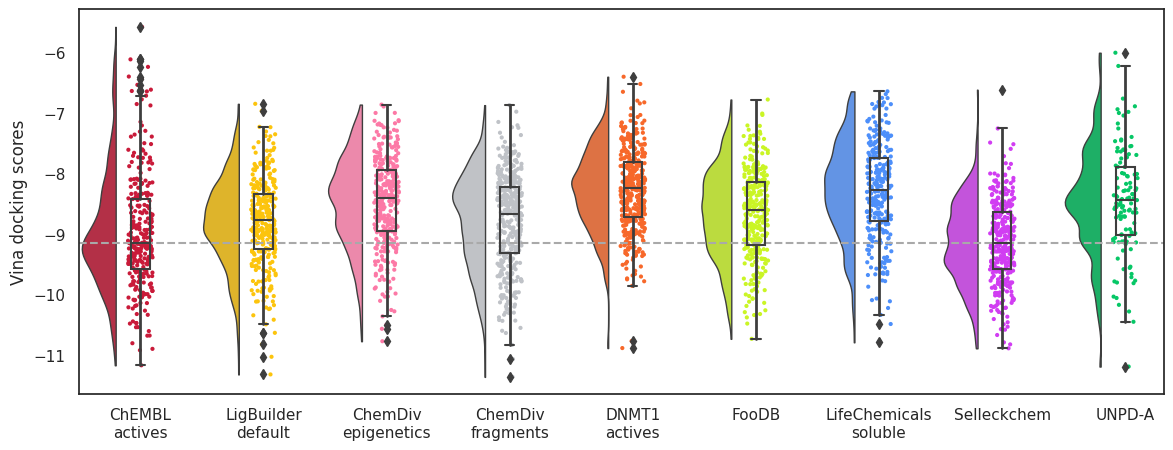

In [ ]:
#Vina scores raincloud plot
palette= ['#C91A39', '#FCC40D', '#FC79A6', '#BFC2C7', '#F7682A', '#CAF525', '#4d8ffa', '#D13DF2', '#06C766']

dx = "DATABASE"; dy = "Vina_scores"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(14, 5))

ax=pt.RainCloud(x = dx, y = dy, data = DATA, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='Vina docking scores')
ax.set(xlabel='')

ax.set_xticklabels(['ChEMBL\nactives', 'LigBuilder\ndefault', 'ChemDiv\nepigenetics', 'ChemDiv\nfragments', 'DNMT1\nactives',
                    'FooDB', 'LifeChemicals\nsoluble', 'Selleckchem', 'UNPD-A'])

plt.axhline(y=-9.146, color="darkgray", linestyle = "dashed")

plt.savefig('LigBuilder_DNMT1_Vina.png', dpi=300)

In [ ]:
#Selection of DNMT1 data from ChEMBL
DNMT1 = DATA[DATA['DATABASE']=="DNMT1"]

#Median Vina docking scores
DNMT1['LeDock_scores'].median()

-8.28

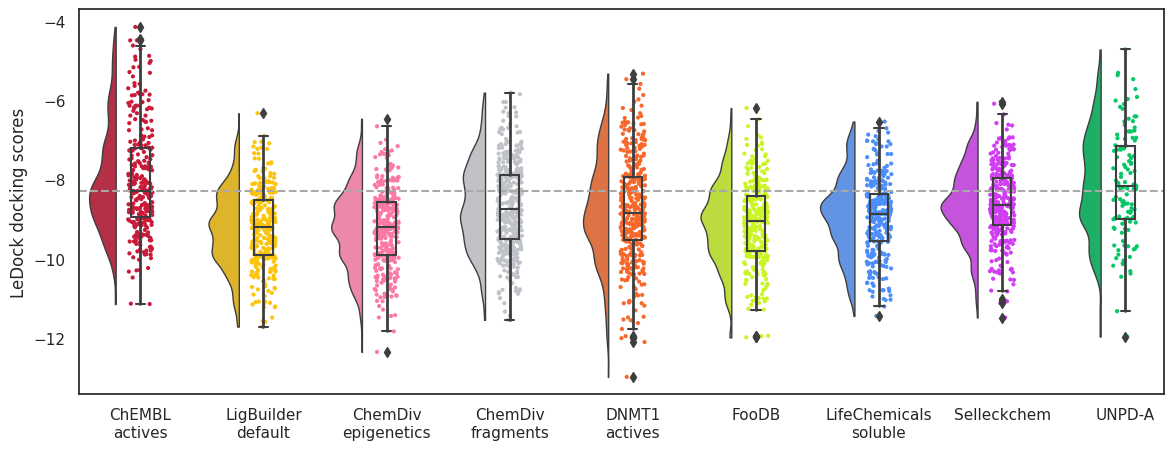

In [ ]:
#LeDock scores raincloud plot
palette= ['#C91A39', '#FCC40D', '#FC79A6', '#BFC2C7', '#F7682A', '#CAF525', '#4d8ffa', '#D13DF2', '#06C766']

dx = "DATABASE"; dy = "LeDock_scores"; ort = "v"; pal = palette; sigma = .2
f, ax = plt.subplots(figsize=(14, 5))

ax=pt.RainCloud(x = dx, y = dy, data = DATA, palette = pal,
      bw = sigma,width_viol = .6, ax = ax, orient = ort)

ax.set(ylabel='LeDock docking scores')
ax.set(xlabel='')

ax.set_xticklabels(['ChEMBL\nactives', 'LigBuilder\ndefault', 'ChemDiv\nepigenetics', 'ChemDiv\nfragments', 'DNMT1\nactives',
                    'FooDB', 'LifeChemicals\nsoluble', 'Selleckchem', 'UNPD-A'])

plt.axhline(y=-8.28, color="darkgray", linestyle = "dashed")

plt.savefig('LigBuilder_DNMT1_LeDock.png', dpi=300)